In [1]:
import os
import h5py
import numpy as np
import xrmreader
import matplotlib.pyplot as plt

spefile module not found
netCDF4 module not found
EdfFile module not found
astropy module not found


In [2]:
file = "../data/Thinlayer 1-3_2023-03-30_155044/tomo-HR/Thinlayer 1-3_tomo-HR_recon_aligned.txm"

In [3]:
header = xrmreader.read_metadata(file)


Could not find any reference data in metadata.

Could not decode filter information.


In [4]:
for key,item in header.items():
    print(key,type(item))

facility <class 'NoneType'>
image_width <class 'int'>
image_height <class 'int'>
data_type <class 'int'>
number_of_images <class 'int'>
pixel_size <class 'float'>
image_data_type <class 'int'>
thetas <class 'numpy.ndarray'>
x-shifts <class 'NoneType'>
y-shifts <class 'NoneType'>
AMC-x-shifts <class 'NoneType'>
AMC-y-shifts <class 'NoneType'>
temperature-x-shifts <class 'NoneType'>
temperature-y-shifts <class 'NoneType'>
source-x-shifts <class 'NoneType'>
source-y-shifts <class 'NoneType'>
align-mode <class 'NoneType'>
center_shift <class 'float'>
rotation_angle <class 'float'>
source_isocenter_distance <class 'float'>
detector_isocenter_distance <class 'float'>
cone_angle <class 'float'>
fan_angle <class 'float'>
camera_offset <class 'float'>
source_drift <class 'NoneType'>
current <class 'float'>
voltage <class 'float'>
power <class 'NoneType'>
exposure_time <class 'NoneType'>
binning <class 'NoneType'>
filter <class 'NoneType'>
scaling_min <class 'float'>
scaling_max <class 'float'>


In [5]:
data = xrmreader.read_txm(file)


Could not find any reference data in metadata.

Could not decode filter information.


In [6]:
range = np.all((data >= 0 ) & (data <= 65535))

In [18]:
if not range:
    print("the array contains values outside the uint16 range")
else:
    _,fractional_part = np.modf(data[10,::])

    non_integer_values = np.where(fractional_part != 0)[0]
    print(non_integer_values)

[  40   40   40 ... 1986 1986 1986]


In [21]:
np.all(data[:100,::] == data[:100,::].astype(int))

True

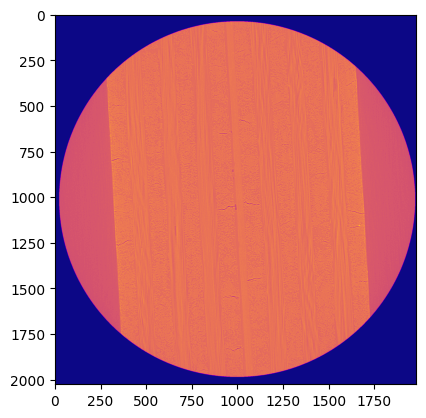

In [16]:
plt.imshow(data[200,::],cmap="plasma")

In [23]:
with h5py.File("../data/Thinlayer 1-3_2023-03-30_155044/tomo-HR/Thinlayer 1-3_tomo-HR_recon_aligned.h5","w") as f:
    
    metadata = f.create_group("metadata")

    for key,item in header.items():
        if item is not None:
            metadata.create_dataset(key,data=item)
        else:
            metadata.create_dataset(key,data="None")
    
    f.create_dataset("volume",data=data.astype(np.uint16),compression="gzip")

In [36]:
metadata_dict = {}
with h5py.File("../data/Thinlayer 1-3_2023-03-30_155044/tomo-HR/Thinlayer 1-3_tomo-HR_recon_aligned.h5","r") as f:
    data = f["volume"][:]
    metadata = f["metadata"]
    for key in metadata.keys():
        metadata_dict[key] = metadata[key]


In [37]:
print(metadata_dict)

{'AMC-x-shifts': <Closed HDF5 dataset>, 'AMC-y-shifts': <Closed HDF5 dataset>, 'align-mode': <Closed HDF5 dataset>, 'binning': <Closed HDF5 dataset>, 'camera_offset': <Closed HDF5 dataset>, 'center_shift': <Closed HDF5 dataset>, 'cone_angle': <Closed HDF5 dataset>, 'current': <Closed HDF5 dataset>, 'data_type': <Closed HDF5 dataset>, 'detector_isocenter_distance': <Closed HDF5 dataset>, 'exposure_time': <Closed HDF5 dataset>, 'facility': <Closed HDF5 dataset>, 'fan_angle': <Closed HDF5 dataset>, 'filter': <Closed HDF5 dataset>, 'image_data_type': <Closed HDF5 dataset>, 'image_height': <Closed HDF5 dataset>, 'image_width': <Closed HDF5 dataset>, 'number_of_images': <Closed HDF5 dataset>, 'pixel_size': <Closed HDF5 dataset>, 'power': <Closed HDF5 dataset>, 'reference': <Closed HDF5 dataset>, 'rotation_angle': <Closed HDF5 dataset>, 'scaling_max': <Closed HDF5 dataset>, 'scaling_min': <Closed HDF5 dataset>, 'source-x-shifts': <Closed HDF5 dataset>, 'source-y-shifts': <Closed HDF5 dataset>